In [ ]:
# Importing all the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path ='/content/drive/MyDrive/Colab Notebooks'

In [ ]:
#Reading Dataset
df = pd.read_csv("/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print('Dimension of Customer Churn  Data:', df.shape)

Dimension of Customer Churn  Data: (7043, 21)


In [ ]:
#Index
print(f'Column names are :', list(df.columns))

Column names are : ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [ ]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Checking for Null Values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# duplicate
len(df[df.duplicated()])

0

In [ ]:
# Identifying the unique number of values in the dataset
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
print(df.apply(lambda col: col.unique()))

customerID          [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...
gender                                                 [Female, Male]
SeniorCitizen                                                  [0, 1]
Partner                                                     [Yes, No]
Dependents                                                  [No, Yes]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                                [No, Yes]
MultipleLines                             [No phone service, No, Yes]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity                         [No, Yes, No internet service]
OnlineBackup                           [Yes, No, No internet service]
DeviceProtection                       [No, Yes, No internet service]
TechSupport                            [No, Yes, No internet service]
StreamingTV                            [No, Yes, No internet service]
StreamingMovies     

**Dataset Attributes**
* **customerID :** Customer ID
* **gender :** Whether the customer is a male or a female
* **SeniorCitizen :** Whether the customer is a senior citizen or not (1, 0)
* **Partner :** Whether the customer has a partner or not (Yes, No)
* **Dependents :** Whether the customer has dependents or not (Yes, No)
* **tenure :** Number of months the customer has stayed with the company
* **PhoneService :** Whether the customer has a phone service or not (Yes, No)
* **MultipleLines :** Whether the customer has multiple lines or not (Yes, No,No phone service)
* **InternetService :** Customer’s internet service provider (DSL, Fiber optic, No)
* **OnlineSecurity :** Whether the customer has online security or not (Yes, No, No internet service)
* **OnlineBackup :** Whether the customer has online backup or not (Yes, No, No internet service)
* **DeviceProtection :** Whether the customer has device protection or not (Yes, No, No internet service)
* **TechSupport :** Whether the customer has tech support or not (Yes, No, No internet service)
* **StreamingTV :** Whether the customer has streaming TV or not (Yes, No, No internet service)
* **StreamingMovies :** Whether the customer has streaming movies or not (Yes, No, No internet service)
* **Contract :** The contract term of the customer (Month-to-month, One year, Two year)
* **PaperlessBilling :** Whether the customer has paperless billing or not (Yes, No)
* **PaymentMethod :** The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* **MonthlyCharges :** The amount charged to the customer monthly
* **TotalCharges :** The total amount charged to the customer
* **Churn :** Whether the customer churned or not (Yes or No)

<Axes: >

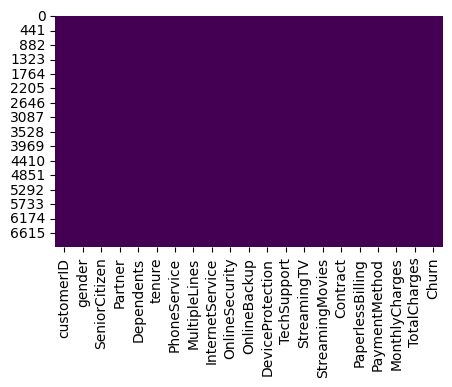

In [ ]:
#Visualizing the missing values
plt.figure(figsize=(5,3))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [ ]:
# Viewing the data statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


**Gender Distribution**

In [ ]:
df.gender.value_counts(dropna=False)

Male      3555
Female    3488
Name: gender, dtype: int64

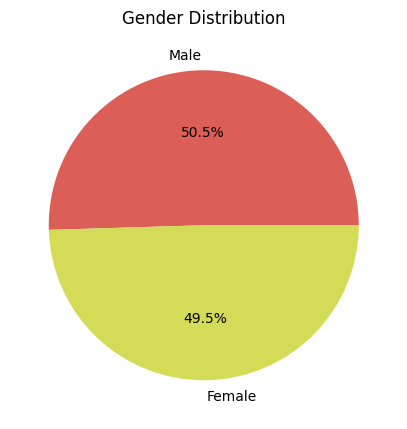

In [ ]:
gender_counts = df['gender'].value_counts()

# pie chart
plt.figure(figsize=(5, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette('hls'))
plt.title('Gender Distribution')
plt.show()

**Churn distribution**

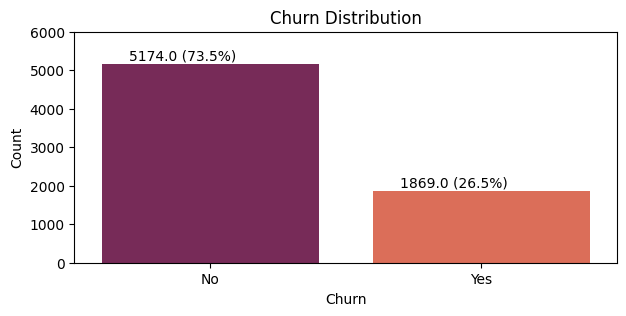

In [ ]:
plt.figure(figsize=(7,3))
ax = sns.countplot(x="Churn", data=df, palette="rocket")
plt.ylim(0, 6000)
plt.xlabel('Churn')
plt.ylabel('Count')  # Update the ylabel for clarity
plt.title('Churn Distribution')

# Annotate the bars with both count and percentage
total_count = len(df['Churn'])
for p in ax.patches:
    count = p.get_height()
    percentage = count / total_count * 100
    ax.annotate(f"{count} ({percentage:.1f}%)", (p.get_x() + 0.1, p.get_height() + 100))

plt.show()

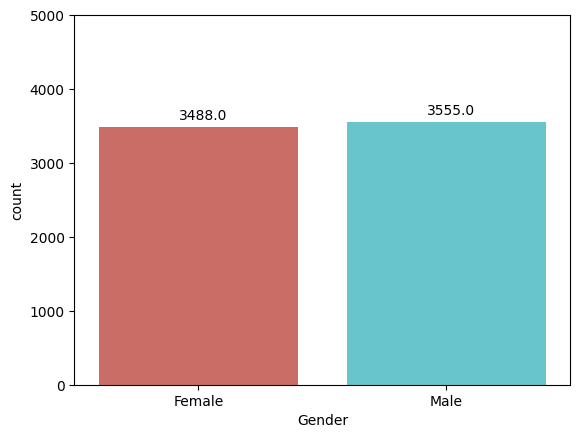

In [ ]:
ax = sns.countplot(x="gender", data=df, palette="hls")
plt.ylim(0,5000)
plt.xlabel('Gender')
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+100))


plt.show()

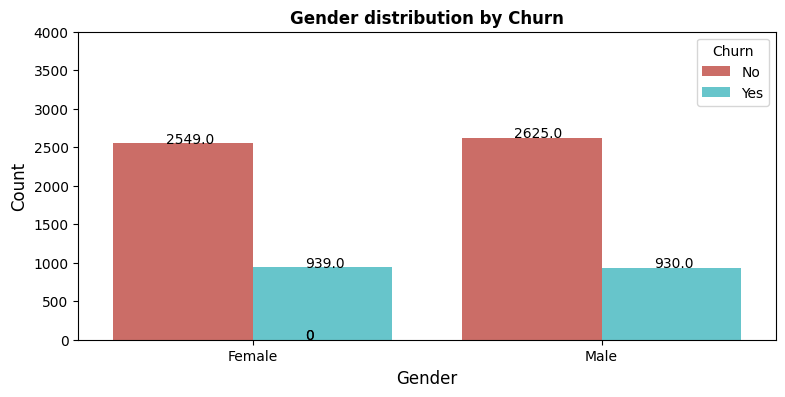

In [ ]:
plt.figure(figsize=(9,4))

ax = sns.countplot(data = df, x = 'gender', hue="Churn", palette = 'hls')

plt.xlabel("Gender", fontsize= 12)
plt.ylabel("Count", fontsize= 12)
plt.ylim(0,4000)

plt.title('Gender distribution by Churn',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+5))

plt.show()

**Senior Citizen distribution**

In [ ]:
df.SeniorCitizen.value_counts(dropna=False)

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

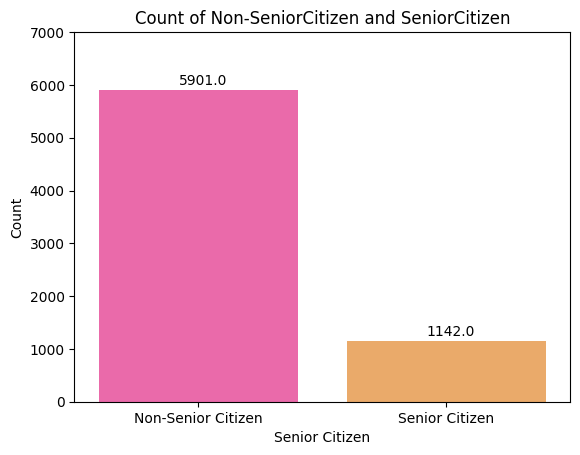

In [ ]:
df['SeniorCitizenLabel'] = df['SeniorCitizen'].map({0: 'Non-Senior Citizen', 1: 'Senior Citizen'})

#  plot
ax = sns.countplot(x="SeniorCitizenLabel", data=df, palette="spring")
plt.ylim(0, 7000)
plt.xlabel('Senior Citizen')
plt.ylabel('Count')  # Update the ylabel for clarity
plt.title('Count of Non-SeniorCitizen and SeniorCitizen')

# Annotate the bars with their respective values
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.32, p.get_height() + 100))

plt.show()

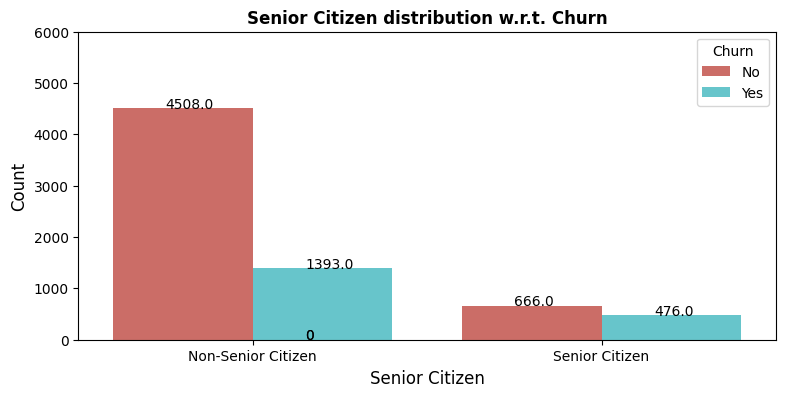

In [ ]:
plt.figure(figsize=(9,4))

ax = sns.countplot(data = df, x = 'SeniorCitizenLabel', hue="Churn", palette = 'hls')

plt.xlabel("Senior Citizen", fontsize= 12)
plt.ylabel("Count", fontsize= 12)
plt.ylim(0,6000)

plt.title('Senior Citizen distribution w.r.t. Churn',weight ='bold')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+5))

plt.show()

**Contract distribution**

In [ ]:
df.Contract.value_counts(dropna=False)

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

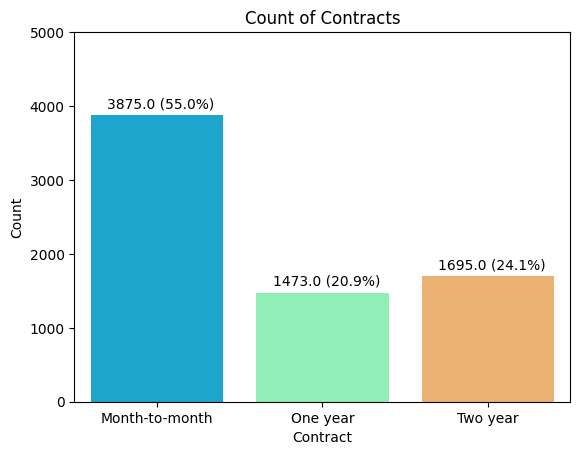

In [ ]:
ax = sns.countplot(x="Contract", data=df, palette="rainbow")
plt.ylim(0, 5000)
plt.xlabel('Contract')
plt.ylabel('Count')  # Update the ylabel for clarity
plt.title('Count of Contracts')

# Annotate the bars with both count and percentage
total_count = len(df['Contract'])
for p in ax.patches:
    count = p.get_height()
    percentage = count / total_count * 100
    ax.annotate(f"{count} ({percentage:.1f}%)", (p.get_x() + 0.1, p.get_height() + 100))

plt.show()

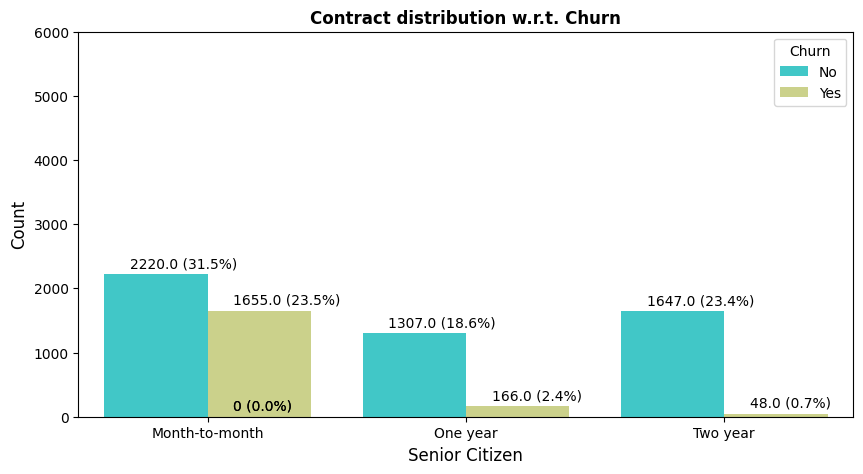

In [ ]:
plt.figure(figsize=(10,5))

ax = sns.countplot(data = df, x = 'Contract', hue="Churn", palette = 'rainbow')

plt.xlabel("Senior Citizen", fontsize= 12)
plt.ylabel("Count", fontsize= 12)
plt.ylim(0,6000)

plt.title('Contract distribution w.r.t. Churn',weight ='bold')

# Annotate the bars with both count and percentage
total_count = len(df['Contract'])
for p in ax.patches:
    count = p.get_height()
    percentage = count / total_count * 100
    ax.annotate(f"{count} ({percentage:.1f}%)", (p.get_x() + 0.1, p.get_height() + 100))

plt.show()

**Payment Method distribution**

In [ ]:
df.PaymentMethod.value_counts(dropna=False)

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

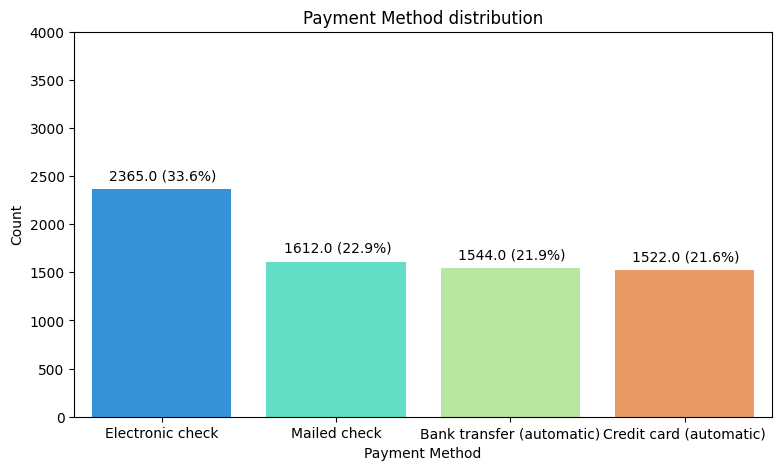

In [ ]:
plt.figure(figsize=(9,5))
ax = sns.countplot(x="PaymentMethod", data=df, palette="rainbow")
plt.ylim(0, 4000)
plt.xlabel('Payment Method')
plt.ylabel('Count')  # Update the ylabel for clarity
plt.title('Payment Method distribution')

# Annotate the bars with both count and percentage
total_count = len(df['PaymentMethod'])
for p in ax.patches:
    count = p.get_height()
    percentage = count / total_count * 100
    ax.annotate(f"{count} ({percentage:.1f}%)", (p.get_x() + 0.1, p.get_height() + 100))

plt.show()

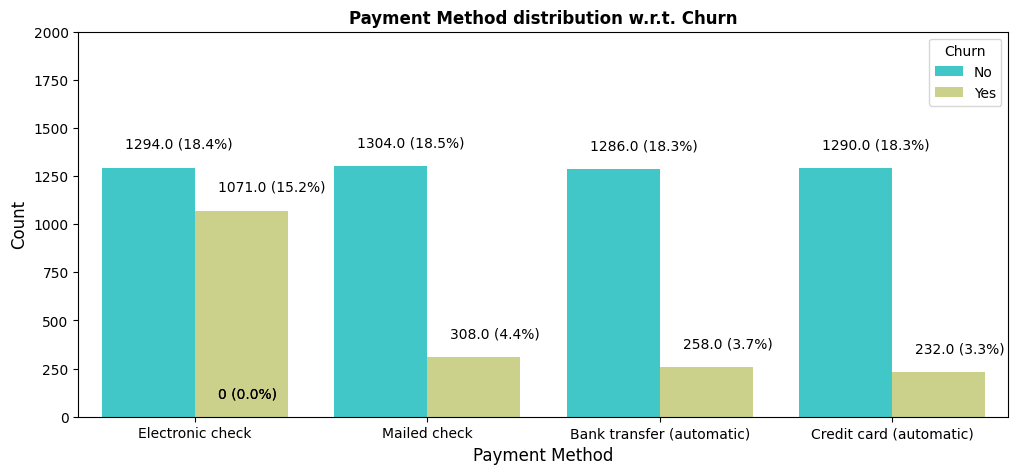

In [ ]:
plt.figure(figsize=(12,5))

ax = sns.countplot(data = df, x = 'PaymentMethod', hue="Churn", palette = 'rainbow')

plt.xlabel("Payment Method", fontsize= 12)
plt.ylabel("Count", fontsize= 12)
plt.ylim(0,2000)

plt.title('Payment Method distribution w.r.t. Churn',weight ='bold')

# Annotate the bars with both count and percentage
total_count = len(df['PaymentMethod'])
for p in ax.patches:
    count = p.get_height()
    percentage = count / total_count * 100
    ax.annotate(f"{count} ({percentage:.1f}%)", (p.get_x() + 0.1, p.get_height() + 100))

plt.show()

**Internet Service distribution**

In [ ]:
df.InternetService.value_counts(dropna=False)

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

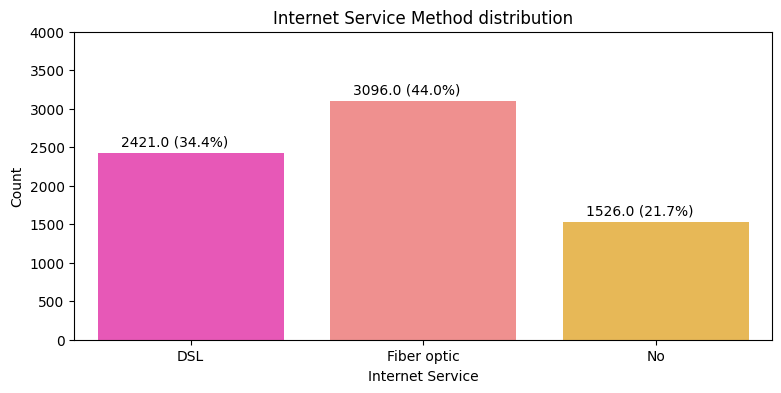

In [ ]:
plt.figure(figsize=(9,4))
ax = sns.countplot(x="InternetService", data=df, palette="spring")
plt.ylim(0, 4000)
plt.xlabel('Internet Service')
plt.ylabel('Count')  # Update the ylabel for clarity
plt.title('Internet Service Method distribution')

# Annotate the bars with both count and percentage
total_count = len(df['InternetService'])
for p in ax.patches:
    count = p.get_height()
    percentage = count / total_count * 100
    ax.annotate(f"{count} ({percentage:.1f}%)", (p.get_x() + 0.1, p.get_height() + 100))

plt.show()

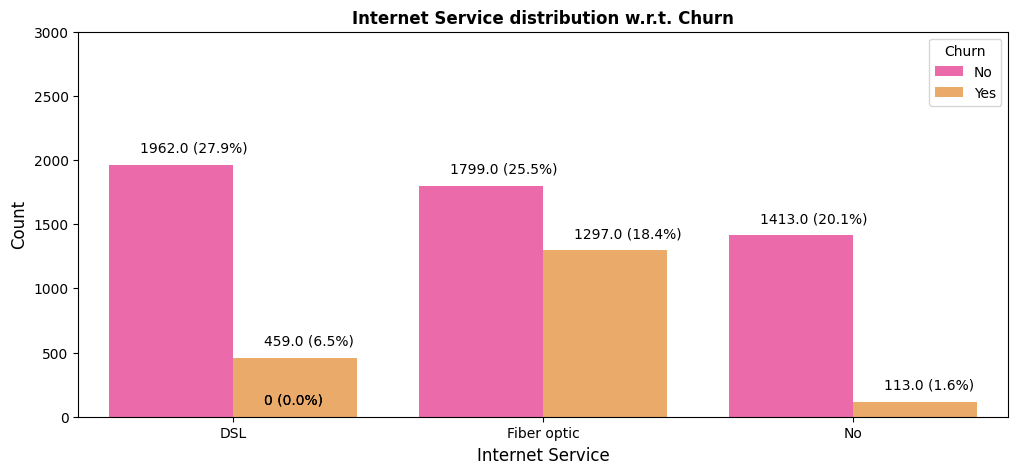

In [ ]:
plt.figure(figsize=(12,5))

ax = sns.countplot(data = df, x = 'InternetService', hue="Churn", palette = 'spring')

plt.xlabel("Internet Service", fontsize= 12)
plt.ylabel("Count", fontsize= 12)
plt.ylim(0,3000)

plt.title('Internet Service distribution w.r.t. Churn',weight ='bold')

# Annotate the bars with both count and percentage
total_count = len(df['InternetService'])
for p in ax.patches:
    count = p.get_height()
    percentage = count / total_count * 100
    ax.annotate(f"{count} ({percentage:.1f}%)", (p.get_x() + 0.1, p.get_height() + 100))

plt.show()

**Online Security distribution**

In [ ]:
df.OnlineSecurity.value_counts(dropna=False)

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

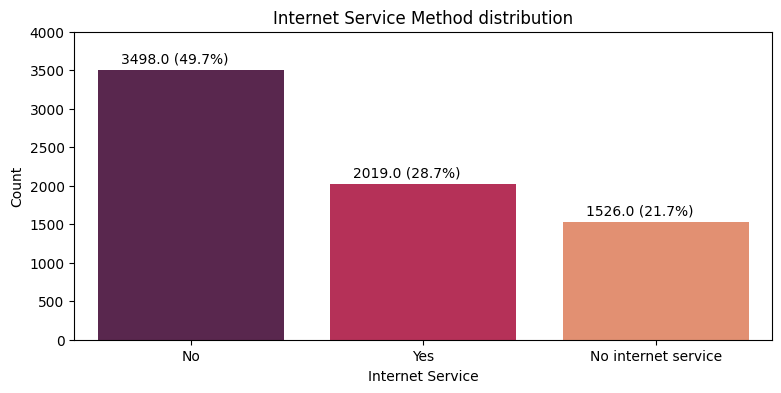

In [ ]:
plt.figure(figsize=(9,4))
ax = sns.countplot(x="OnlineSecurity", data=df, palette="rocket")
plt.ylim(0, 4000)
plt.xlabel('Internet Service')
plt.ylabel('Count')  # Update the ylabel for clarity
plt.title('Internet Service Method distribution')

# Annotate the bars with both count and percentage
total_count = len(df['OnlineSecurity'])
for p in ax.patches:
    count = p.get_height()
    percentage = count / total_count * 100
    ax.annotate(f"{count} ({percentage:.1f}%)", (p.get_x() + 0.1, p.get_height() + 100))

plt.show()

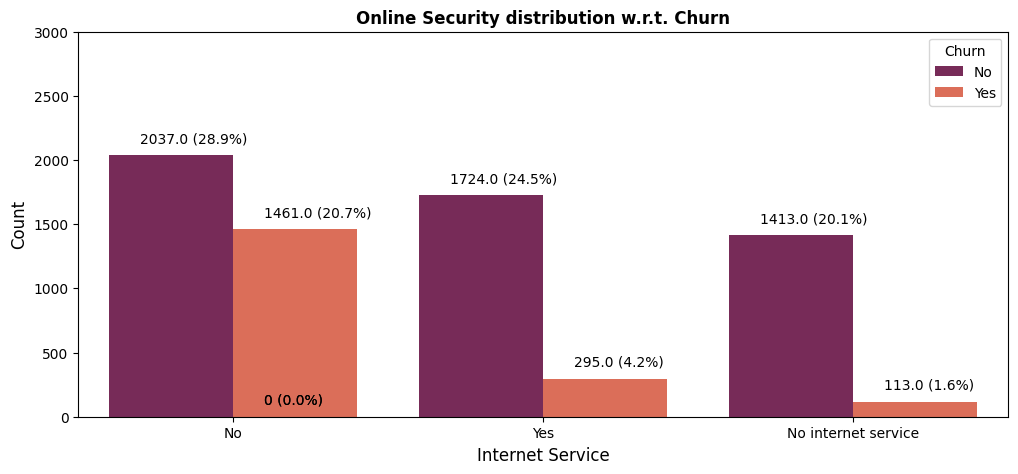

In [ ]:
plt.figure(figsize=(12,5))

ax = sns.countplot(data = df, x = 'OnlineSecurity', hue="Churn", palette = 'rocket')

plt.xlabel("Internet Service", fontsize= 12)
plt.ylabel("Count", fontsize= 12)
plt.ylim(0,3000)

plt.title('Online Security distribution w.r.t. Churn',weight ='bold')

# Annotate the bars with both count and percentage
total_count = len(df['OnlineSecurity'])
for p in ax.patches:
    count = p.get_height()
    percentage = count / total_count * 100
    ax.annotate(f"{count} ({percentage:.1f}%)", (p.get_x() + 0.1, p.get_height() + 100))

plt.show()

**Online Backup distribution**

In [ ]:
df.OnlineBackup.value_counts(dropna=False)

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

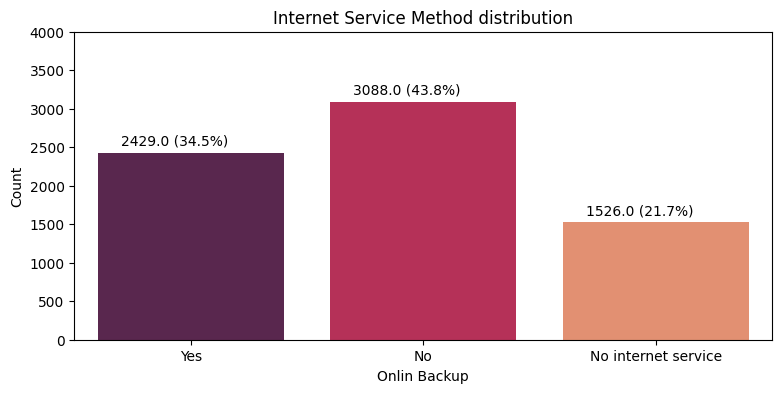

In [ ]:
plt.figure(figsize=(9,4))
ax = sns.countplot(x="OnlineBackup", data=df, palette="rocket")
plt.ylim(0, 4000)
plt.xlabel('Onlin Backup')
plt.ylabel('Count')  # Update the ylabel for clarity
plt.title('Internet Service Method distribution')

# Annotate the bars with both count and percentage
total_count = len(df['OnlineBackup'])
for p in ax.patches:
    count = p.get_height()
    percentage = count / total_count * 100
    ax.annotate(f"{count} ({percentage:.1f}%)", (p.get_x() + 0.1, p.get_height() + 100))

plt.show()

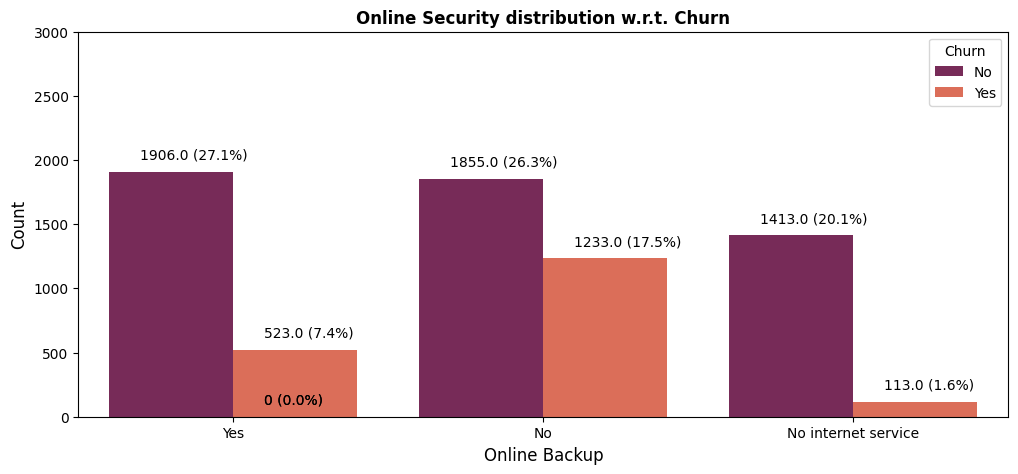

In [ ]:
plt.figure(figsize=(12,5))

ax = sns.countplot(data = df, x = 'OnlineBackup', hue="Churn", palette = 'rocket')

plt.xlabel("Online Backup", fontsize= 12)
plt.ylabel("Count", fontsize= 12)
plt.ylim(0,3000)

plt.title('Online Security distribution w.r.t. Churn',weight ='bold')

# Annotate the bars with both count and percentage
total_count = len(df['OnlineSecurity'])
for p in ax.patches:
    count = p.get_height()
    percentage = count / total_count * 100
    ax.annotate(f"{count} ({percentage:.1f}%)", (p.get_x() + 0.1, p.get_height() + 100))

plt.show()

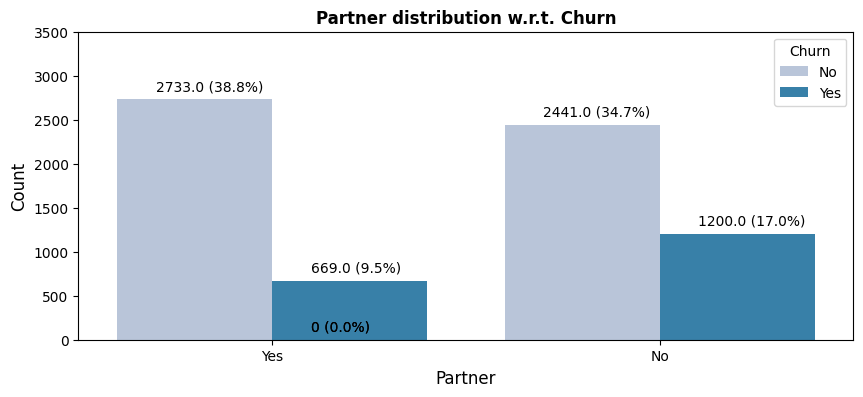

In [ ]:
plt.figure(figsize=(10,4))

ax = sns.countplot(data = df, x = 'Partner', hue="Churn", palette = 'PuBu')

plt.xlabel("Partner", fontsize= 12)
plt.ylabel("Count", fontsize= 12)
plt.ylim(0,3500)

plt.title('Partner distribution w.r.t. Churn',weight ='bold')

# Annotate the bars with both count and percentage
total_count = len(df['Partner'])
for p in ax.patches:
    count = p.get_height()
    percentage = count / total_count * 100
    ax.annotate(f"{count} ({percentage:.1f}%)", (p.get_x() + 0.1, p.get_height() + 100))

plt.show()

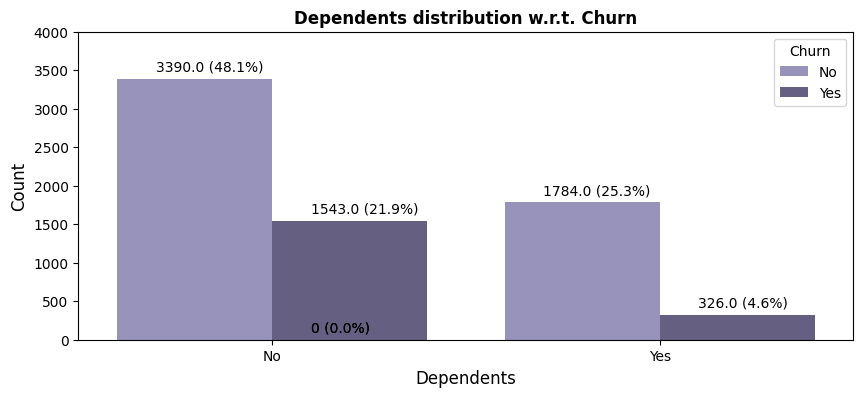

In [ ]:
plt.figure(figsize=(10,4))

ax = sns.countplot(data = df, x = 'Dependents', hue="Churn", palette = 'Purples_d')

plt.xlabel("Dependents", fontsize= 12)
plt.ylabel("Count", fontsize= 12)
plt.ylim(0,4000)

plt.title('Dependents distribution w.r.t. Churn',weight ='bold')

# Annotate the bars with both count and percentage
total_count = len(df['Dependents'])
for p in ax.patches:
    count = p.get_height()
    percentage = count / total_count * 100
    ax.annotate(f"{count} ({percentage:.1f}%)", (p.get_x() + 0.1, p.get_height() + 100))

In [ ]:
import plotly.express as px
fig = px.histogram(df, x="tenure")
fig.show()

In [ ]:
fig = px.histogram(df, x="tenure", color="gender")
fig.show()

In [ ]:
fig = px.histogram(df, x="MonthlyCharges")
fig.show()

In [ ]:
fig = px.histogram(df, x="MonthlyCharges", color="gender")
fig.show()

In [ ]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

**It is string. Lets convert it to numbers**

In [ ]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

**Some values seems to be not numbers but blank string. Let's find out such rows**

In [ ]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

In [ ]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

In [ ]:
df.shape

In [ ]:
df.iloc[488].TotalCharges

In [ ]:
df[df.TotalCharges!=' '].shape

In [ ]:
#Remove rows with space in TotalCharges

df1 = df[df.TotalCharges!=' ']
df1.shape

In [ ]:
#Check data types
df1.dtypes

In [ ]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [ ]:
df1.TotalCharges.values

In [ ]:
fig = px.histogram(df1, x="TotalCharges")
fig.show()

In [ ]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [ ]:
print_unique_col_values(df1)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']
SeniorCitizenLabel: ['Non-Senior Citizen' 'Senior Citizen']


**Some of the columns have no internet service or no phone service, that can be replaced with a simple No**

In [ ]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [ ]:
print_unique_col_values(df1)

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']
SeniorCitizenLabel: ['Non-Senior Citizen' 'Senior Citizen']


**Convert Yes and No to 1 or 0**

In [ ]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [ ]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
SeniorCitizenLabel: ['Non-Senior Citizen' 'Senior Citizen']


In [ ]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [ ]:
df1.gender.unique()

array([1, 0])

**One hot encoding for categorical columns**

In [ ]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'SeniorCitizenLabel', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df2.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6380,2378-VTKDH,0,1,1,0,65,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
3035,7924-GJZFI,1,1,1,0,25,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
6671,5090-EMGTC,1,0,1,0,59,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
1162,9359-UGBTK,1,0,0,0,67,1,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4265,2632-UCGVD,0,1,1,0,66,1,1,0,0,...,0,1,0,1,0,0,0,1,0,0


In [ ]:
df2.dtypes

customerID                                  object
gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
SeniorCitizenLabel                          object
InternetService_DSL            

In [ ]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [ ]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

In [ ]:
#Drop SeniorCitizenLabel
df2.drop(['SeniorCitizenLabel', 'customerID'], axis=1, inplace=True)

In [ ]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

In [ ]:
# Exclude non-numeric columns before calculating correlation
numerical_columns = df2.select_dtypes(include='number').columns
corelation = df2[numerical_columns].corr()

# Display the resulting correlation matrix
corelation


In [ ]:
plt.figure(figsize=(19,12))
sns.heatmap(corelation.corr(),annot=True,cmap='Greens')
plt.show()

In [ ]:
# Select features (X) and target variable (y)
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
X_train[:10]

In [ ]:
len(X_train.columns)

In [ ]:
#Buliding a Model
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
history = model.fit(X_train,y_train,batch_size=50,epochs=120,verbose=1,validation_split=0.2)

In [ ]:
model.evaluate(X_test, y_test)


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_pr = []
for element in y_pred:
    if element > 0.5:
        y_pr.append(1)
    else:
        y_pr.append(0)

In [ ]:
y_pr[:10]

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()

plt.show()

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.legend()

plt.show()

In [ ]:
y_test[:10]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
print(confusion_matrix(y_test,y_pr))
print(classification_report(y_test,y_pr))

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pr)

plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_test.shape

In [ ]:
#Accuracy
round((862+229)/(862+229+137+179),2)

In [ ]:
#Precision for 0 class. i.e. Precision for customers who did not churn
round(862/(862+179),2)

In [ ]:
#Precision for 1 class. i.e. Precision for customers who actually churned
round(229/(229+137),2)

In [ ]:
#Recall for 0 class
round(862/(862+137),2)

In [ ]:
round(229/(229+179),2)